In [1]:
import numpy as np
import pandas as pd

# PreProcessing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [9]:
df.sample()['clean_comment'].values

array(['they will never that those people are their actual vote bank '],
      dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [31]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [36]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [41]:
df.dropna(inplace = True)

In [43]:
df.duplicated().sum()

np.int64(350)

In [44]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df.duplicated().sum()

np.int64(0)

In [49]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [50]:
df[~(df['clean_comment'].str.strip() == '')]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [51]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [53]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [57]:
df['clean_comment'] = df['clean_comment'].str.strip()
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category


In [60]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_url = df[df['clean_comment'].str.contains(url_pattern, regex = True)]
comments_with_url.head()

,clean_comment,category


In [63]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [68]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


# EDA

<Axes: xlabel='category', ylabel='count'>

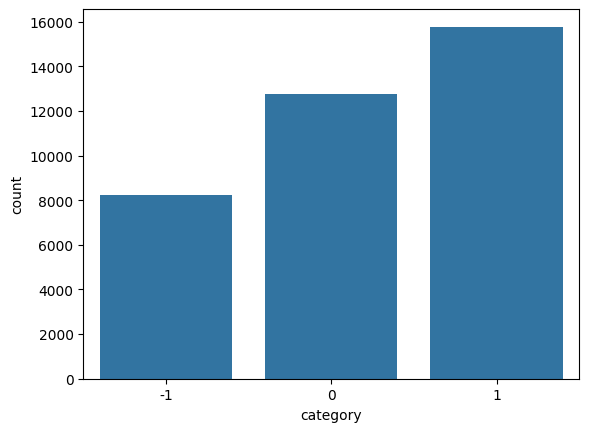

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'category')

In [74]:
df['category'].value_counts(normalize = True).mul(100).round(2)

category
 1    42.86
 0    34.72
-1    22.42
Name: proportion, dtype: float64

In [75]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [77]:
df.sample(5)

,clean_comment,category,word_count
26591,well course use trump probably too fucking stu...,-1,21
11435,friends notes events sabhi hamare sath jude ra...,1,84
18862,lol people only wake when shit starts affectin...,1,21
17827,shastri need pitch which can properly prepare ...,1,11
32444,political party should have this their slogan ...,0,18


In [78]:
df['word_count'].describe()

count    36799.000000
mean        29.662627
std         56.787371
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

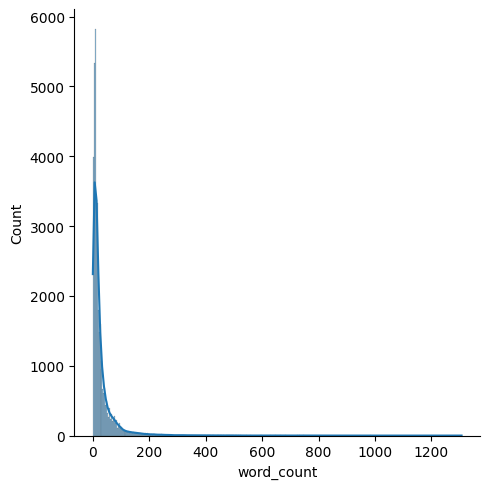

In [80]:
sns.displot(data = df['word_count'], kde = True)

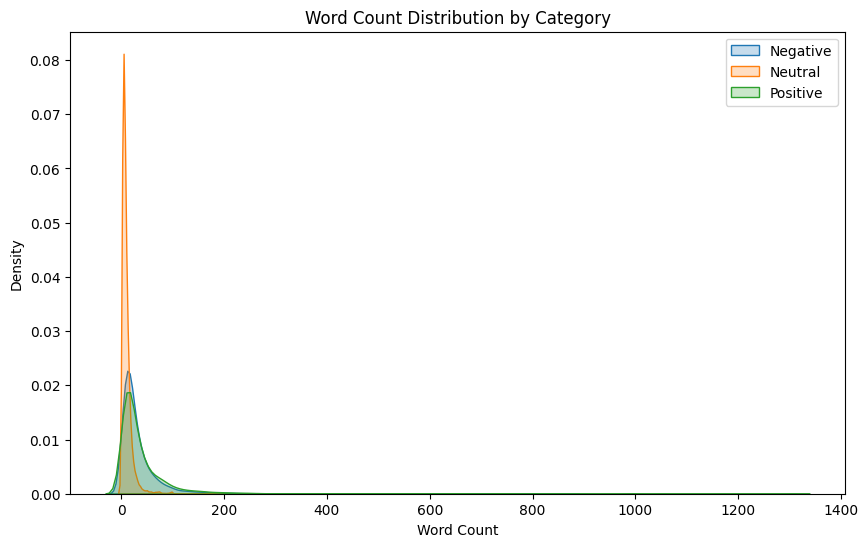

In [87]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df[df['category'] == -1]['word_count'], label = "Negative", fill=True)
sns.kdeplot(data=df[df['category'] == 0]['word_count'], label = "Neutral", fill=True)
sns.kdeplot(data=df[df['category'] == 1]['word_count'], label = "Positive", fill=True)

plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Word Count Distribution by Category')

plt.legend()
plt.show()

<Axes: ylabel='word_count'>

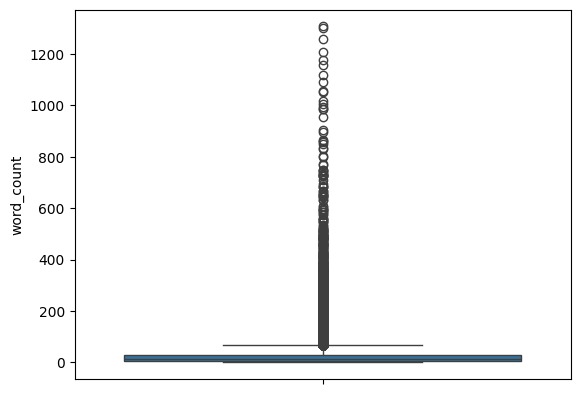

In [88]:
sns.boxplot(data=df['word_count'])

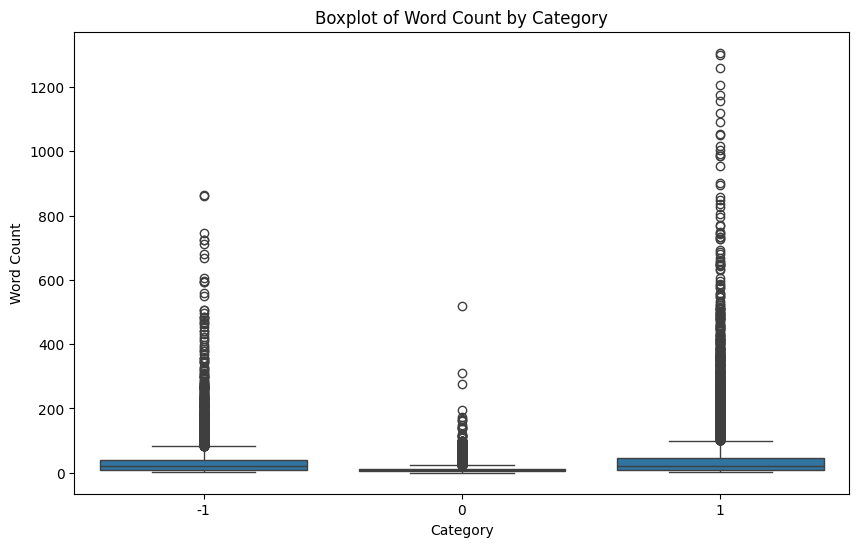

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='word_count')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.title('Boxplot of Word Count by Category')
plt.show()

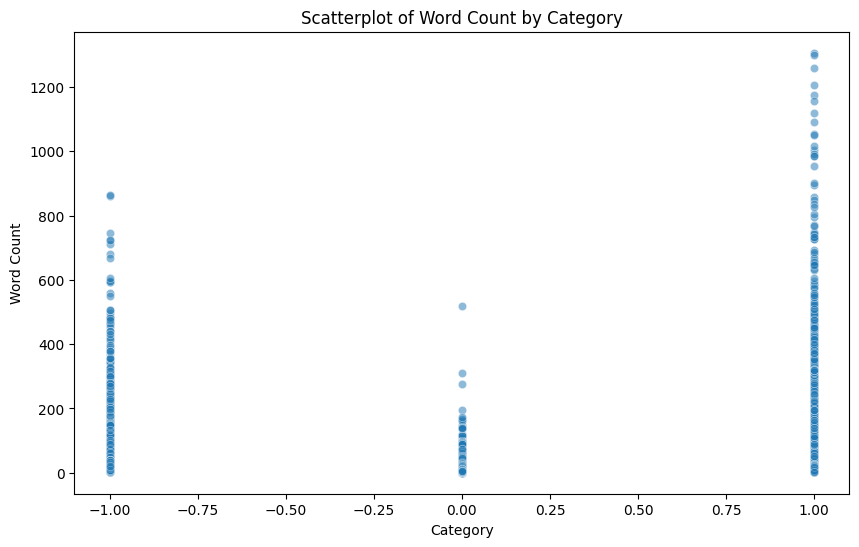

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

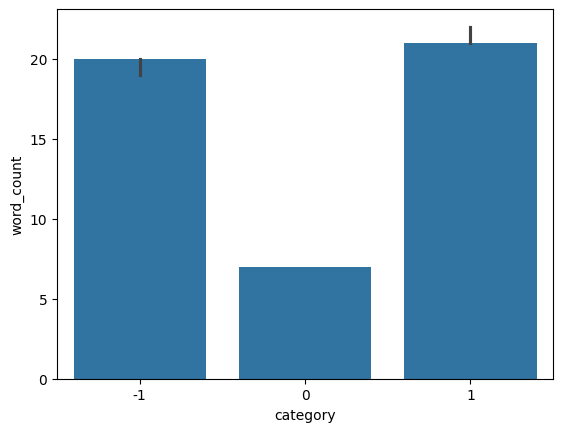

In [93]:
sns.barplot(data=df, x='category', y='word_count', estimator='median')


In [100]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
df['num_stopwords'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/viet2005/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
df.sample(5)

,clean_comment,category,word_count,num_stopwords
35168,that very good comprehensive list unbelievable...,1,20,6
18809,laos ban bitcoin,0,3,0
7304,friend mom doesn allow friend have sexual roma...,1,58,28
27531,mallaya gone plays crab rave,0,5,0
9522,alright trying secure airbnb with couple peopl...,1,43,14


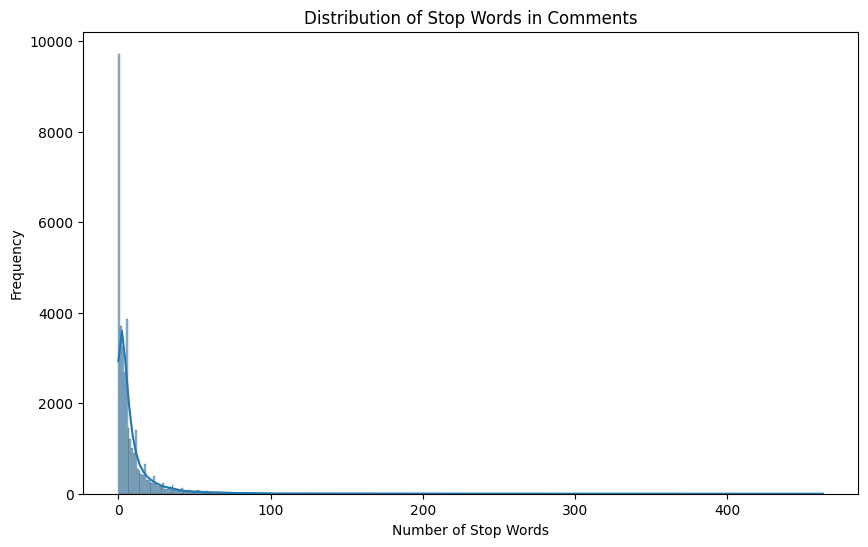

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['num_stopwords'],kde=True)
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.title('Distribution of Stop Words in Comments')
plt.show()

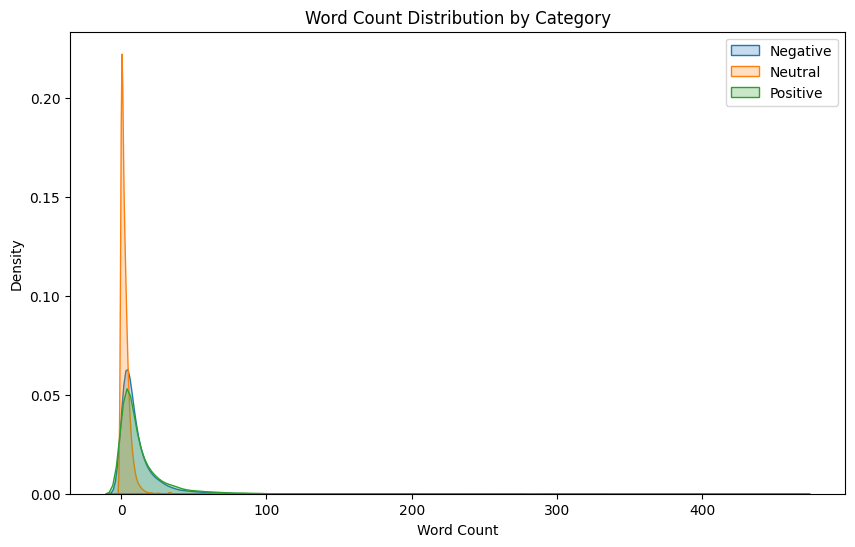

In [103]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df[df['category'] == -1]['num_stopwords'], label = "Negative", fill=True)
sns.kdeplot(data=df[df['category'] == 0]['num_stopwords'], label = "Neutral", fill=True)
sns.kdeplot(data=df[df['category'] == 1]['num_stopwords'], label = "Positive", fill=True)

plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Word Count Distribution by Category')

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stopwords'>

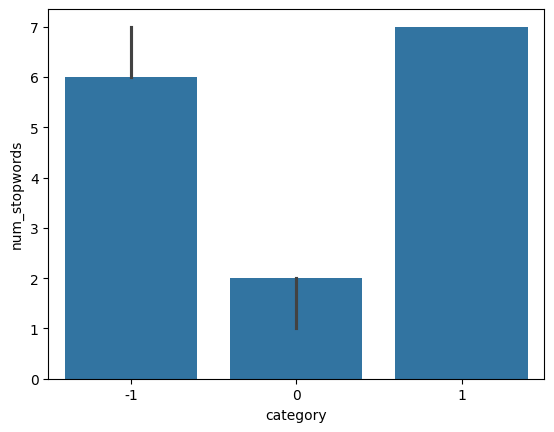

In [104]:
sns.barplot(data=df, x='category', y='num_stopwords', estimator='median')

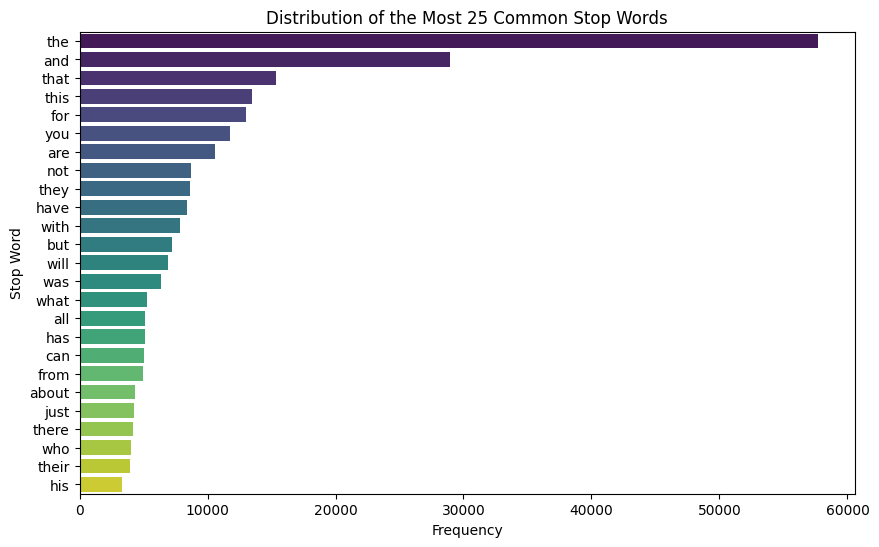

In [108]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stopwords = Counter(all_stop_words).most_common(25)
top_25_stopwords_df = pd.DataFrame(most_common_stopwords, columns = ('stopwords', 'count'))

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_stopwords_df, x='count', y='stopwords', hue='stopwords', palette='viridis', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Stop Word')
plt.title('Distribution of the Most 25 Common Stop Words')
plt.show()

In [109]:
df['num_char'] = df['clean_comment'].apply(len)
df.head(5)

,clean_comment,category,word_count,num_stopwords,num_char
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [116]:
all_comments = ' '.join(df['clean_comment'])
char_frequency = Counter(all_comments)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ('character', 'frequency')).sort_values(by='frequency', ascending=False)

In [ ]:
char_frequency_df['character'].values
char_frequency_df.tail(50)

In [125]:
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.sample(5)

,clean_comment,category,word_count,num_stopwords,num_char,num_punctuation_chars
5592,they should played this vid the launch event b...,1,12,4,66,0
14747,til comes between and both numbers are prime n...,1,23,7,141,0
23042,that quite accomplishment thanks hia hard word...,-1,11,2,84,0
9112,red tapism still present encouragement for sma...,-1,73,24,437,0
25012,can someone translate his last punch line for ...,1,13,5,72,0


In [126]:
df['num_punctuation_chars'].describe()

count    36799.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

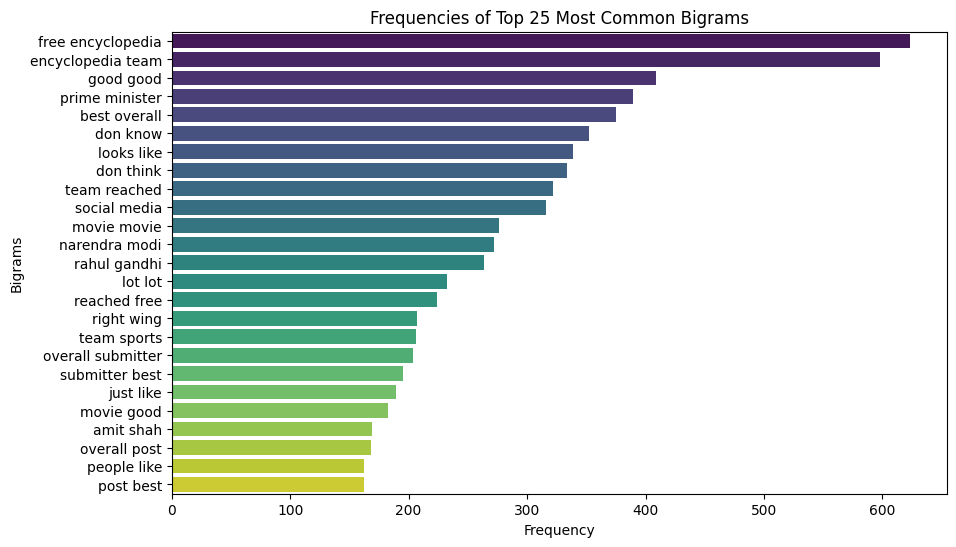

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, ind]) for word, ind in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_n_bigrams(df['clean_comment'], n=25)
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=('bigram', 'frequency'))

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_bigrams_df, x='frequency', y='bigram', hue='bigram', palette= 'viridis', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Frequencies of Top 25 Most Common Bigrams')
plt.show()

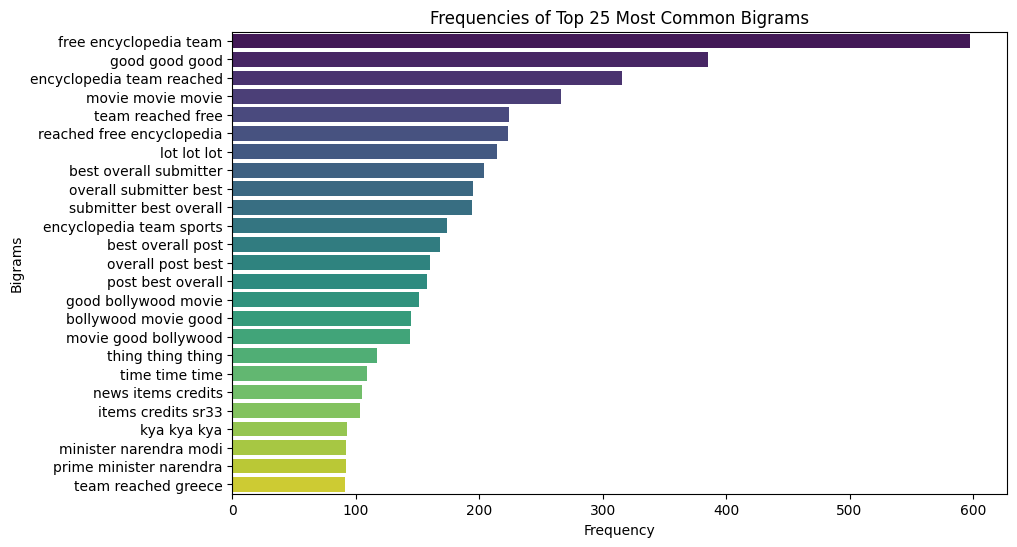

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, ind]) for word, ind in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

top_25_trigrams = get_top_n_trigrams(df['clean_comment'], n=25)
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=('bigram', 'frequency'))

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_trigrams_df, x='frequency', y='bigram', hue='bigram', palette= 'viridis', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Frequencies of Top 25 Most Common Bigrams')
plt.show()

In [139]:
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [141]:
all_text = ' '.join(df['clean_comment'])
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(), columns=('char','freq')).sort_values(by='freq', ascending=False)
char_freq_df.tail(10)

,char,freq
27,5,1631
35,3,1617
29,4,1573
28,6,1403
36,7,1291
33,8,1199
38,,76
37,\t,11
40,,3
39,,1


In [142]:
df.head()

,clean_comment,category,word_count,num_stopwords,num_char,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [144]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [145]:
df.head()

,clean_comment,category,word_count,num_stopwords,num_char,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [146]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /home/viet2005/nltk_data...


,clean_comment,category,word_count,num_stopwords,num_char,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


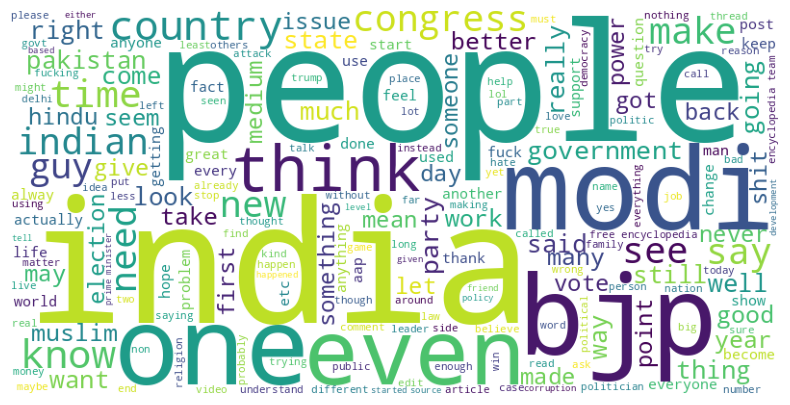

In [148]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
plot_word_cloud(df['clean_comment'])

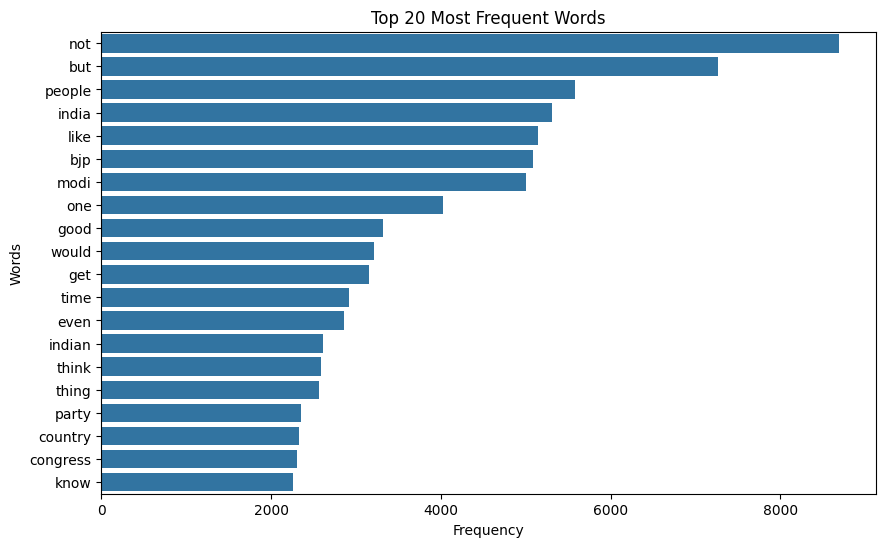

In [159]:
def plot_top_n_words(df, n=None):
    all_text = ' '.join(df['clean_comment'])

    word_frequency = Counter(all_text.split())
    most_common_words = word_frequency.most_common(n)
    words, frequency = zip(*most_common_words)

    plt.figure(figsize=(10,6))
    sns.barplot(x=frequency, y=words)
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
plot_top_n_words(df, n=20)



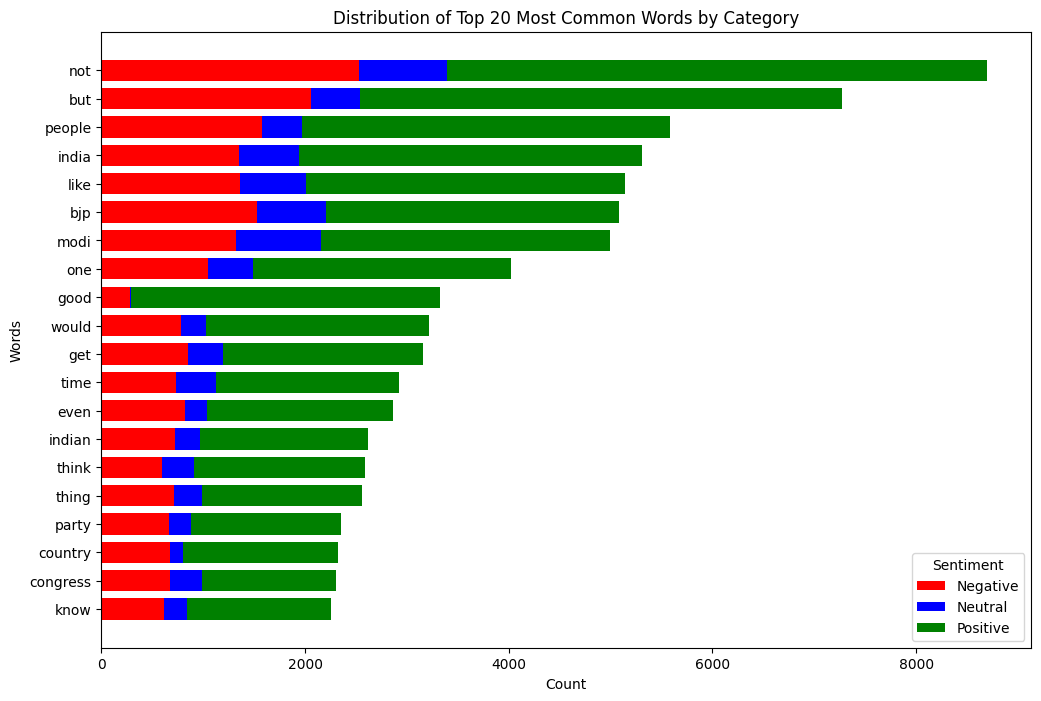

In [175]:
def top_n_words_by_category(df, n=20, start=0):
    word_category_count={}
    for ind, row in df.iterrows():
        word_list = row['clean_comment'].split()
        category = row['category']
        for word in word_list:
            if word not in word_category_count:
                word_category_count[word] = {-1:0, 0:0, 1:0}
            word_category_count[word][category] +=1 
    total_word_counts = [(word, sum(count.values())) for word, count in word_category_count.items()]
    top_n_words = sorted(total_word_counts, key = lambda x: x[1], reverse=True)[start:start+n]
    words_only = [x[0] for x in top_n_words]
    negative_counts = [word_category_count[word][-1] for word in words_only]
    neutral_counts = [word_category_count[word][0] for word in words_only]
    positive_counts = [word_category_count[word][1] for word in words_only]

    bar_width = 0.75
    plt.figure(figsize=(12,8))
    plt.barh(words_only, negative_counts, color = 'red',label='Negative', height=bar_width)
    plt.barh(words_only, neutral_counts, left = negative_counts, color = 'blue',label='Neutral',height=bar_width)
    plt.barh(words_only, positive_counts, left = [i+j for i,j in zip(negative_counts,neutral_counts)],color='green',label='Positive',height=bar_width)

    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title(f'Distribution of Top {n} Most Common Words by Category')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

top_n_words_by_category(df, n=20)